In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [40]:
from yahoofinancials import YahooFinancials
import yfinance as yf
from scipy.optimize import minimize
import scipy.optimize as sco
import seaborn as sns

In [41]:
# Import our data from yahoo finance
GOOG = yf.download("GOOG", start="2012-05-18", end="2025-03-01",group_by="ticker") # Stock of Google
AAPL = yf.download("AAPL", start="2012-05-18", end="2025-03-01",group_by="ticker") # Stock of Apple
META = yf.download("META", start="2012-05-18", end="2025-03-01",group_by="ticker") # Stock of Facebook
AMZN = yf.download("AMZN", start="2012-05-18", end="2025-03-01",group_by="ticker") # Stock of Amazon
MSFT = yf.download("MSFT", start="2012-05-18", end="2025-03-01",group_by="ticker") # Stock of Microsoft
GSPC = yf.download("^GSPC", start="2012-05-18", end="2025-03-01",group_by="ticker") # Stock of S&P 500
# print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
GOOG[('GOOG',   'Open')]

Date
2012-05-18     15.495749
2012-05-21     14.886180
2012-05-22     15.206707
2012-05-23     14.914441
2012-05-24     15.100608
                 ...    
2025-02-24    183.590841
2025-02-25    179.949986
2025-02-26    176.743646
2025-02-27    175.739787
2025-02-28    170.106204
Name: (GOOG, Open), Length: 3214, dtype: float64

In [43]:
GOOG.isnull().sum()

Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [98]:
# I only want the closing values
GOOG_close = GOOG[('GOOG',   'Close')]
AAPL_close = AAPL[('AAPL',   'Close')]
META_close = META[('META',   'Close')]
AMZN_close = AMZN[('AMZN',   'Close')]
GSPC_close = GSPC[('^GSPC', 'Close')]
MSFT_close = MSFT[('MSFT',   'Close')]

closing_prices = pd.DataFrame(pd.concat([GOOG_close, AAPL_close, META_close, AMZN_close, MSFT_close, GSPC_close], axis=1))
closing_prices.columns = ['GOOG', 'AAPL', 'META', 'AMZN', 'MSFT', 'GSPC']
closing_prices.head()

,GOOG,AAPL,META,AMZN,MSFT,GSPC
Date,,,,,,
2012-05-18,14.883454,15.961046,38.050667,10.6925,23.350187,1295.219971
2012-05-21,15.223313,16.890934,33.870369,10.9055,23.733110,1315.989990
2012-05-22,14.893371,16.761232,30.854584,10.7665,23.741089,1316.630005
2012-05-23,15.108045,17.170202,31.849892,10.8640,23.222546,1318.859985
2012-05-24,14.964268,17.012512,32.875053,10.7620,23.190639,1320.680054


In [99]:
closing_prices    

,GOOG,AAPL,META,AMZN,MSFT,GSPC
Date,,,,,,
2012-05-18,14.883454,15.961046,38.050667,10.692500,23.350187,1295.219971
2012-05-21,15.223313,16.890934,33.870369,10.905500,23.733110,1315.989990
2012-05-22,14.893371,16.761232,30.854584,10.766500,23.741089,1316.630005
2012-05-23,15.108045,17.170202,31.849892,10.864000,23.222546,1318.859985
2012-05-24,14.964268,17.012512,32.875053,10.762000,23.190639,1320.680054
...,...,...,...,...,...,...
2025-02-24,180.983810,247.100006,667.536133,212.710007,404.000000,5983.250000
2025-02-25,177.168152,247.039993,656.915588,212.800003,397.899994,5955.250000
2025-02-26,174.501190,240.360001,673.101196,214.350006,399.730011,5956.060059


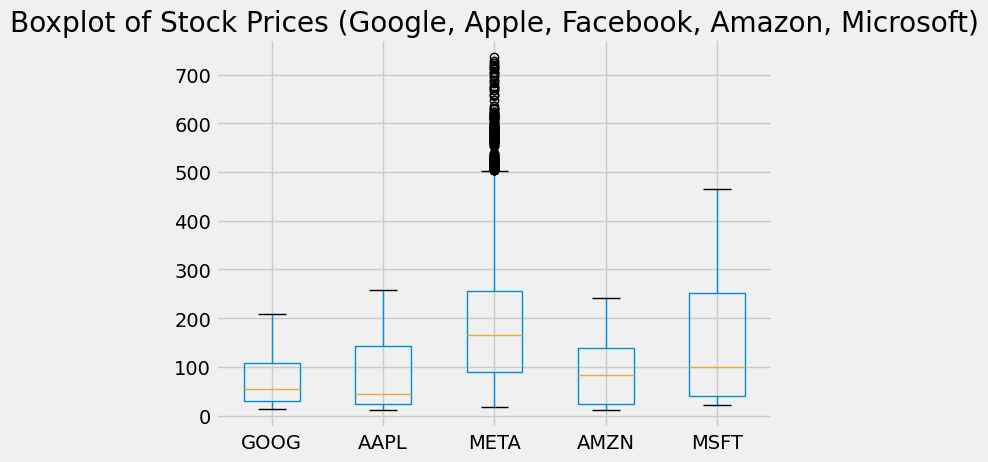

In [46]:
plt.style.use("fivethirtyeight")
closing_prices[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

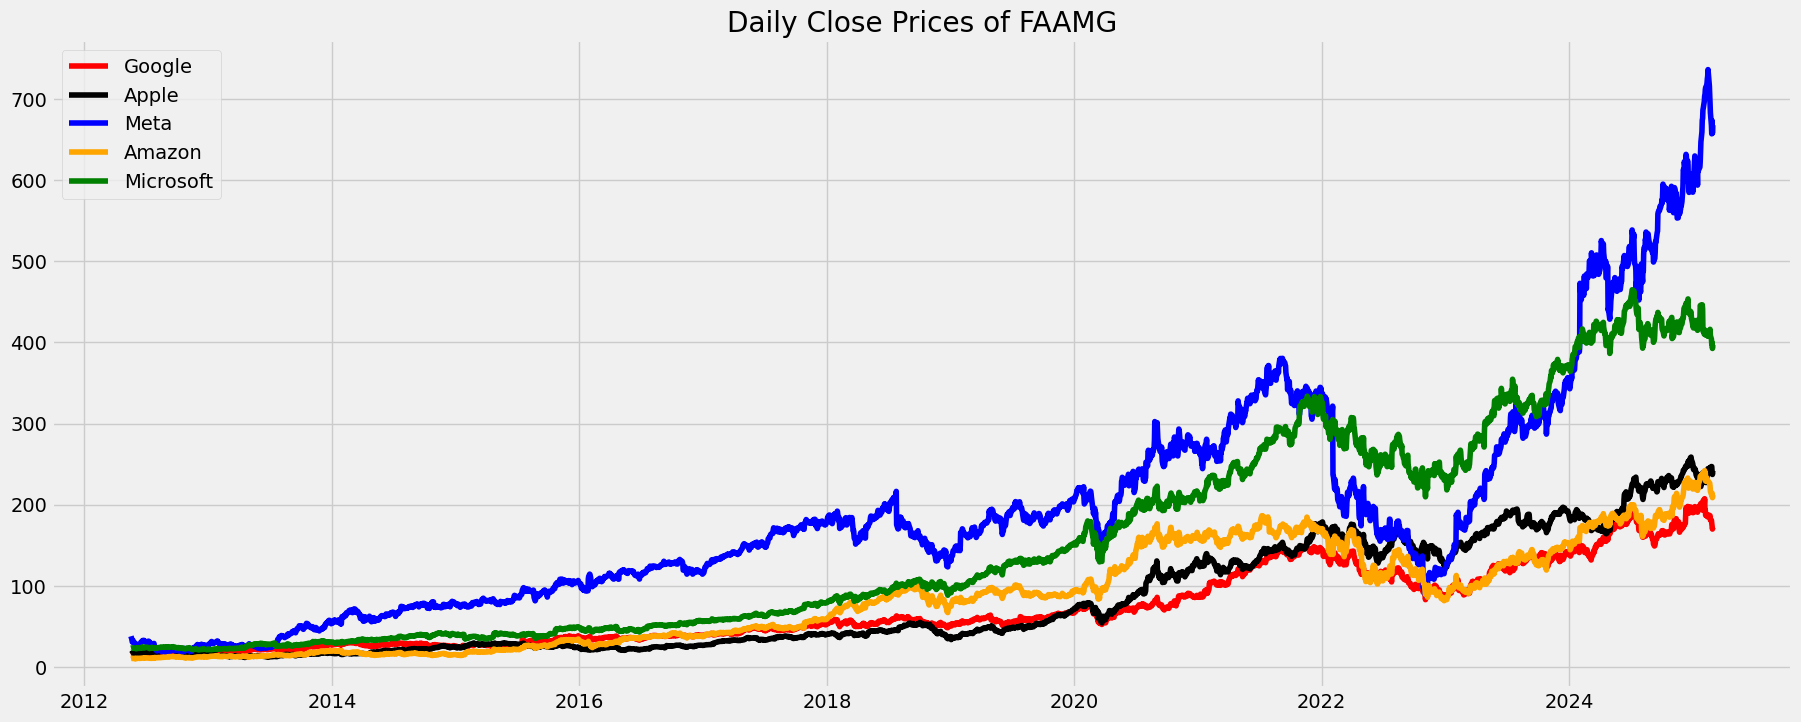

In [47]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of FAAMG')
plt.plot(closing_prices['GOOG'], 'red', label='Google')
plt.plot(closing_prices['AAPL'], 'black', label='Apple')
plt.plot(closing_prices['META'], 'blue', label='Meta')
plt.plot(closing_prices['AMZN'], 'orange', label='Amazon')
plt.plot(closing_prices['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()


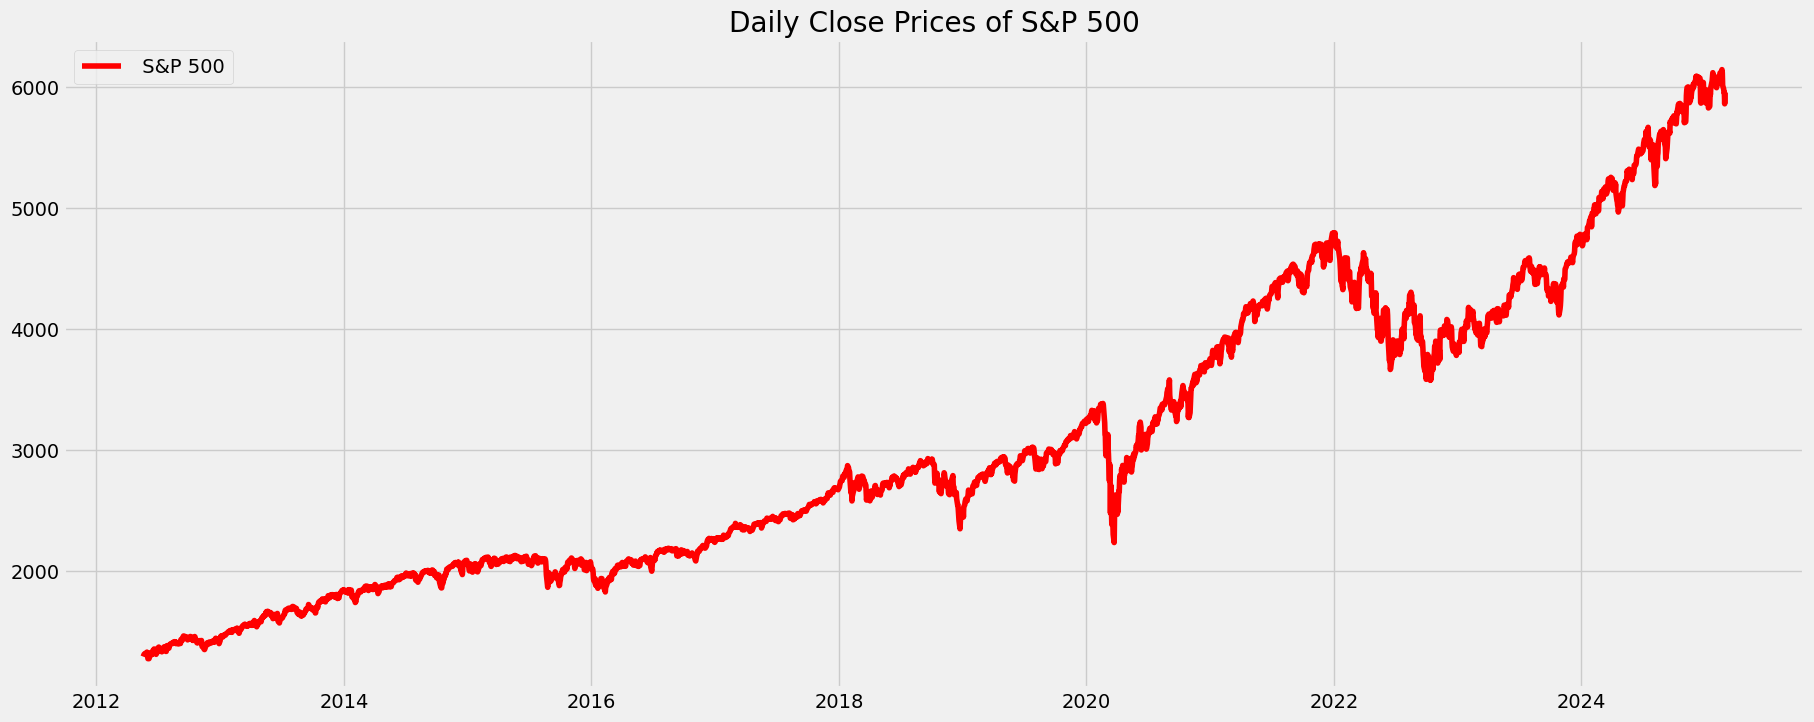

In [48]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.plot(closing_prices['GSPC'], 'Red', label=' S&P 500')
plt.legend()
plt.show()

In [94]:
# We can calculate the simple returns or % change of this portfolio
closing_returns = pd.DataFrame()
closing_returns['R_GOOG'] = closing_prices[['GOOG']].pct_change(1)
closing_returns['R_AAPL'] = closing_prices[['AAPL']].pct_change(1)
closing_returns['R_META'] = closing_prices[['META']].pct_change(1)
closing_returns['R_AMZN'] = closing_prices[['AMZN']].pct_change(1)
closing_returns['R_MSFT'] = closing_prices[['MSFT']].pct_change(1)
closing_returns['R_GSPC'] = closing_prices[['GSPC']].pct_change(1)
closing_returns.head()

,R_GOOG,R_AAPL,R_META,R_AMZN,R_MSFT,R_GSPC
Date,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,0.022835,0.058260,-0.109861,0.019921,0.016399,0.016036
2012-05-22,-0.021674,-0.007679,-0.089039,-0.012746,0.000336,0.000486
2012-05-23,0.014414,0.024400,0.032258,0.009056,-0.021842,0.001694
2012-05-24,-0.009517,-0.009184,0.032187,-0.009389,-0.001374,0.001380


In [95]:
closing_returns[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.017171
R_AAPL    0.017635
R_META    0.025021
R_AMZN    0.020130
R_MSFT    0.016456
R_GSPC    0.010530
dtype: float64

In [96]:
closing_returns[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].mean()

R_GOOG    0.000909
R_AAPL    0.001002
R_META    0.001205
R_AMZN    0.001132
R_MSFT    0.001018
R_GSPC    0.000531
dtype: float64

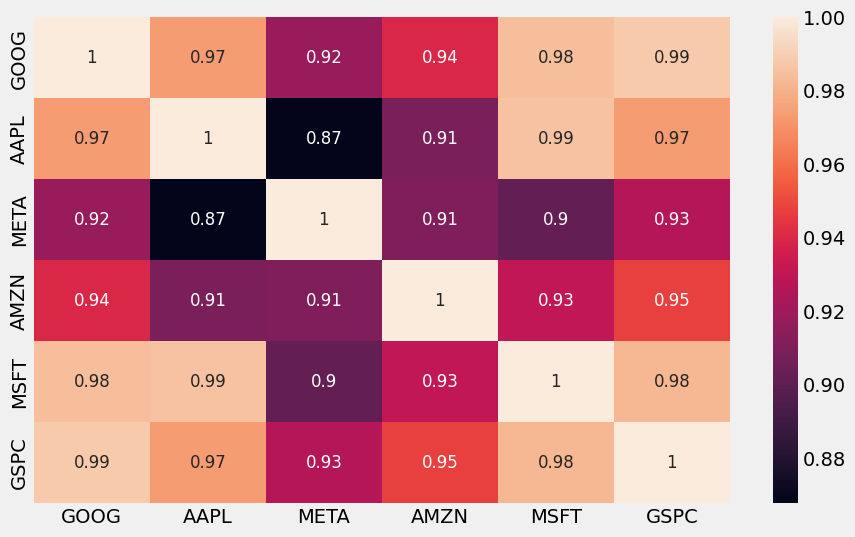

In [52]:
corr = closing_prices[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

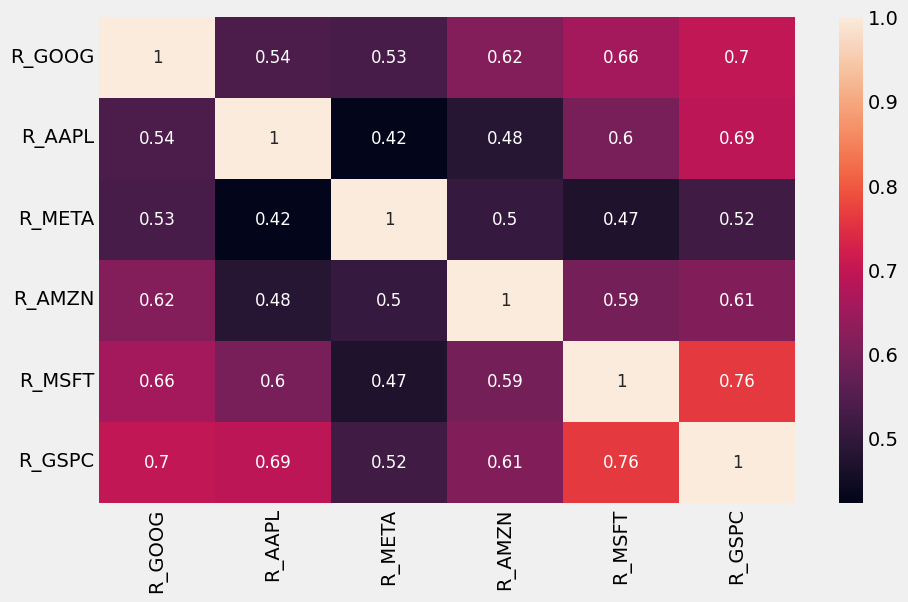

In [97]:
corr = closing_returns[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [ ]:
# We shall be implementing Monte Carlo simulation along with mean variance optimization  to find the optimal weights of the stocks in our portfolio.
# We shall be using the following functions to calculate the expected returns, volatility and sharpe ratio of our portfolio.

def portfolio_perf(weights, returns, risk_free_rate=0.025):
    port_return = np.sum(weights * returns.mean() * 252)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    return port_return, port_volatility, sharpe_ratio


In [101]:
x = np.random.random(len(closing_prices.columns))
x

array([0.39084685, 0.34256578, 0.72436793, 0.35415665, 0.77352533,
       0.5234087 ])

In [102]:
num_ports = 10000
all_weights = np.zeros((num_ports, len(closing_prices.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

In [103]:
all_weights

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [100]:
returns = closing_prices.pct_change().dropna()
returns

,GOOG,AAPL,META,AMZN,MSFT,GSPC
Date,,,,,,
2012-05-21,0.022835,0.058260,-0.109861,0.019921,0.016399,0.016036
2012-05-22,-0.021674,-0.007679,-0.089039,-0.012746,0.000336,0.000486
2012-05-23,0.014414,0.024400,0.032258,0.009056,-0.021842,0.001694
2012-05-24,-0.009517,-0.009184,0.032187,-0.009389,-0.001374,0.001380
2012-05-25,-0.020094,-0.005360,-0.033908,-0.010918,-0.000344,-0.002166
...,...,...,...,...,...,...
2025-02-24,-0.002148,0.006312,-0.022559,-0.017869,-0.010313,-0.004969
2025-02-25,-0.021083,-0.000243,-0.015910,0.000423,-0.015099,-0.004680
2025-02-26,-0.015053,-0.027040,0.024639,0.007284,0.004599,0.000136


In [104]:
returns.mean() 

GOOG    0.000909
AAPL    0.001002
META    0.001205
AMZN    0.001132
MSFT    0.001018
GSPC    0.000531
dtype: float64

In [105]:

for i in range(num_ports):
    weights = np.random.random(len(closing_prices.columns))
    weights /= np.sum(weights)
    all_weights[i, :] = weights
    ret_arr[i], vol_arr[i], sharpe_arr[i] = portfolio_perf(weights, returns)

In [109]:
vol_arr

array([0.21741537, 0.2197789 , 0.23061689, ..., 0.25113597, 0.22732373,
       0.24122447])

In [83]:
vol_arr

array([0., 0., 0., ..., 0., 0., 0.])

In [110]:
max_sharpe_idx = sharpe_arr.argmax()
best_weights = all_weights[max_sharpe_idx]

In [119]:
max_sharpe_idx

9988

In [111]:
best_weights

array([0.02673368, 0.26184522, 0.1491135 , 0.25982903, 0.29404245,
       0.00843611])

In [113]:
def neg_sharpe(weights, returns, risk_free_rate=0.025):
    return -portfolio_perf(weights, returns, risk_free_rate)[2]

In [114]:
# We use the Lagrange-Newton method to find the optimal weights of the portfolio by maximizing the sharpe ratio.
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(closing_prices.columns)))
init_guess = np.ones(len(closing_prices.columns)) / len(closing_prices.columns)
opt_results = minimize(neg_sharpe, init_guess, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = opt_results.x

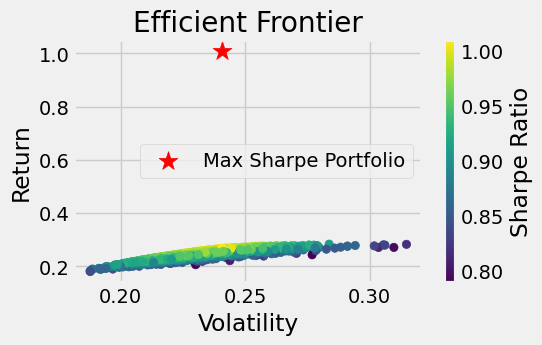

In [118]:
# Plot Efficient Frontier
plt.figure(figsize=(5, 3))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(*portfolio_perf(best_weights, returns)[1:3], color='red', marker='*', s=200, label='Max Sharpe Portfolio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.title('Efficient Frontier')
plt.show()

In [120]:
print("Optimal Weights:", optimal_weights)


Optimal Weights: [1.30831415e-17 2.80224739e-01 1.29164311e-01 2.25642304e-01
 3.64968646e-01 0.00000000e+00]
